# 第三十一讲：线性变换及对应矩阵

如何判断一个操作是不是线性变换？线性变换需满足以下两个要求：

$$
T(v+w)=T(v)+T(w)\\
T(cv)=cT(v)
$$

即变换$T$需要同时满足加法和数乘不变的性质。将两个性质合成一个式子为：$T(cv+dw)=cT(v)+dT(w)$



例1，二维空间中的投影操作，$T: \mathbb{R}^2\to\mathbb{R}^2$，它可以将某向量投影在一条特定直线上。检查一下投影操作，如果我们将向量长度翻倍，则其投影也翻倍；两向量相加后做投影与两向量做投影再相加结果一致。所以投影操作是线性变换。

“坏”例1，二维空间的平移操作，即平面平移：

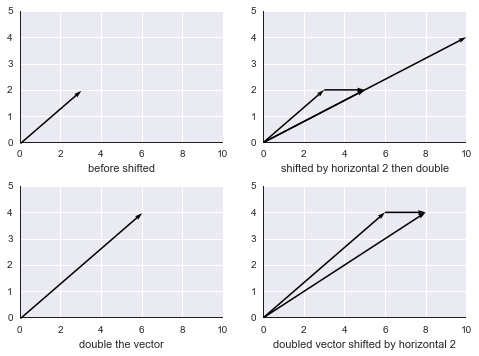

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


fig = plt.figure()

sp1 = plt.subplot(221)
vectors_1 = np.array([[0,0,3,2],]) 
X_1, Y_1, U_1, V_1 = zip(*vectors_1)
plt.axhline(y=0, c='black')
plt.axvline(x=0, c='black')
sp1.quiver(X_1, Y_1, U_1, V_1, angles='xy', scale_units='xy', scale=1)
sp1.set_xlim(0, 10)
sp1.set_ylim(0, 5)
sp1.set_xlabel("before shifted")

sp2 = plt.subplot(222)
vector_2 = np.array([[0,0,3,2],
                     [3,2,2,0],
                     [0,0,5,2],
                     [0,0,10,4]]) 
X_2,Y_2,U_2,V_2 = zip(*vector_2)
plt.axhline(y=0, c='black')
plt.axvline(x=0, c='black')
sp2.quiver(X_2, Y_2, U_2, V_2, angles='xy', scale_units='xy', scale=1)
sp2.set_xlim(0, 10)
sp2.set_ylim(0, 5)
sp2.set_xlabel("shifted by horizontal 2 then double")

sp3 = plt.subplot(223)
vectors_1 = np.array([[0,0,6,4],]) 
X_1, Y_1, U_1, V_1 = zip(*vectors_1)
plt.axhline(y=0, c='black')
plt.axvline(x=0, c='black')
sp3.quiver(X_1, Y_1, U_1, V_1, angles='xy', scale_units='xy', scale=1)
sp3.set_xlim(0, 10)
sp3.set_ylim(0, 5)
sp3.set_xlabel("double the vector")

sp4 = plt.subplot(224)
vector_2 = np.array([[0,0,6,4],
                     [6,4,2,0],
                     [0,0,8,4]]) 
X_2,Y_2,U_2,V_2 = zip(*vector_2)
plt.axhline(y=0, c='black')
plt.axvline(x=0, c='black')
sp4.quiver(X_2, Y_2, U_2, V_2, angles='xy', scale_units='xy', scale=1)
sp4.set_xlim(0, 10)
sp4.set_ylim(0, 5)
sp4.set_xlabel("doubled vector shifted by horizontal 2")

plt.subplots_adjust(hspace=0.33)
plt.draw()

In [2]:
plt.close(fig)

比如，上图中向量长度翻倍，再做平移，明显与向量平移后再翻倍的结果不一致。

有时我们也可以用一个简单的特例判断线性变换，检查$T(0)\stackrel{?}{=}0$。零向量平移后结果并不为零。

所以平面平移操作并不是线性变换。

“坏”例2，求模运算，$T(v)=\|v\|,\ T:\mathbb{R}^3\to\mathbb{R}^1$，这显然不是线性变换，比如如果我们将向量翻倍则其模翻倍，但如果我将向量翻倍取负，则其模依然翻倍。所以$T(-v)\neq -T(v)$

例2，旋转$45^\circ$操作，$T:\mathbb{R}^2\to\mathbb{R}^2$，也就是将平面内一个向量映射为平面内另一个向量。检查可知，如果向量翻倍，则旋转后同样翻倍；两个向量先旋转后相加，与这两个向量先相加后旋转得到的结果一样。

所以从上面的例子我们知道，投影与旋转都是线性变换。

例3，矩阵乘以向量，$T(v)=Av$，这也是一个（一系列）线性变换，不同的矩阵代表不同的线性变换。根据矩阵的运算法则有$A(v+w)=A(v)+A(w),\ A(cv)=cAv$。比如取$A=\begin{bmatrix}1&0\\0&-1\end{bmatrix}$，作用于平面上的向量$v$，会导致$v$的$x$分量不变，而$y$分量取反，也就是图像沿$x$轴翻转。

线性变换的核心，就是该变换使用的相应的矩阵。

比如我们需要做一个线性变换，将一个三维向量降至二维，$T:\mathbb{R}^3\to\mathbb{R}^2$，则在$T(v)=Av$中，$v\in\mathbb{R}^3,\ T(v)\in\mathbb{R}^2$，所以$A$应当是一个$2\times 3$矩阵。

如果我们希望知道线性变换$T$对整个输入空间$\mathbb{R}^n$的影响，我们可以找到空间的一组基$v_1,\ v_2,\ \cdots,\ v_n$，检查$T$对每一个基的影响$T(v_1),\ T(v_2),\ \cdots,\ T(v_n)$，由于输入空间中的任意向量都满足：

$$v=c_1v_1+c_2v_2+\cdots+c_nv_n\tag{1}$$

所以我们可以根据$T(v)$推出线性变换$T$对空间内任意向量的影响，得到：

$$T(v)=c_1T(v_1)+c_2T(v_2)+\cdots+c_nT(v_n)\tag{2}$$

现在我们需要考虑，如何把一个与坐标无关的线性变换变成一个与坐标有关的矩阵呢？

在$1$式中，$c_1,c_2,\cdots,c_n$就是向量$v$在基$v_1,v_2,\cdots,v_n$上的坐标，比如分解向量$v=\begin{bmatrix}3\\2\\4\end{bmatrix}=3\begin{bmatrix}1\\0\\0\end{bmatrix}+2\begin{bmatrix}0\\1\\0\end{bmatrix}+4\begin{bmatrix}0\\0\\1\end{bmatrix}$，式子将向量$v$分解在一组标准正交基$\begin{bmatrix}1\\0\\0\end{bmatrix},\begin{bmatrix}0\\1\\0\end{bmatrix},\begin{bmatrix}0\\0\\1\end{bmatrix}$上。当然，我们也可以选用矩阵的特征向量作为基向量，基的选择是多种多样的。

我们打算构造一个矩阵$A$用以表示线性变换$T:\mathbb{R}^n\to\mathbb{R}^m$。我们需要两组基，一组用以表示输入向量，一组用以表示输出向量。令$v_1,v_2,\cdots,v_n$为输入向量的基，这些向量来自$\mathbb{R}^n$；$w_1,w_2,\cdots,w_m$作为输出向量的基，这些向量来自$\mathbb{R}^m$。

我们用二维空间的投影矩阵作为例子：

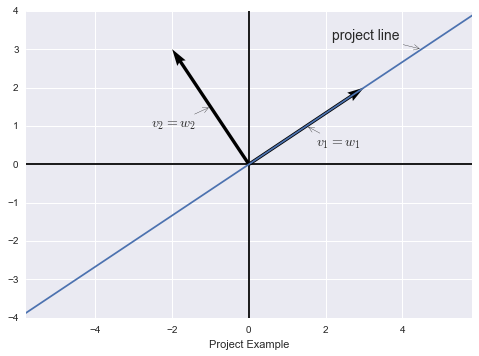

In [3]:
fig = plt.figure()

vectors_1 = np.array([[0, 0, 3, 2],
                      [0, 0, -2, 3]]) 
X_1, Y_1, U_1, V_1 = zip(*vectors_1)
plt.axis('equal')
plt.axhline(y=0, c='black')
plt.axvline(x=0, c='black')
plt.quiver(X_1, Y_1, U_1, V_1, angles='xy', scale_units='xy', scale=1)
plt.plot([-6, 12], [-4, 8])
plt.annotate('$v_1=w_1$', xy=(1.5, 1), xytext=(10, -20), textcoords='offset points', size=14, arrowprops=dict(arrowstyle="->"))
plt.annotate('$v_2=w_2$', xy=(-1, 1.5), xytext=(-60, -20), textcoords='offset points', size=14, arrowprops=dict(arrowstyle="->"))
plt.annotate('project line', xy=(4.5, 3), xytext=(-90, 10), textcoords='offset points', size=14, arrowprops=dict(arrowstyle="->"))

ax = plt.gca()
ax.set_xlim(-5, 5)
ax.set_ylim(-4, 4)
ax.set_xlabel("Project Example")

plt.draw()

In [4]:
plt.close(fig)

从图中可以看到，设输入向量的基为$v_1,v_2$，$v_1$就在投影上，而$v_2$垂直于投影方向，输出向量的基为$w_1,w_2$，而$v_1=w_1,v_2=w_2$。那么如果输入向量为$v=c_1v_1+c_2v_2$，则输出向量为$T(v)=c_1v_1$，也就是线性变换去掉了法线方向的分量，输入坐标为$(c_1,c_2)$，输出坐标变为$(c_1,0)$。

找出这个矩阵并不困难，$Av=w$，则有$\begin{bmatrix}1&0\\0&0\end{bmatrix}\begin{bmatrix}c_1\\c_2\end{bmatrix}=\begin{bmatrix}c_1\\0\end{bmatrix}$。

本例中我们选取的基极为特殊，一个沿投影方向，另一个沿投影法线方向，其实这两个向量都是投影矩阵的特征向量，所以我们得到的线性变换矩阵是一个对角矩阵，这是一组很好的基。

所以，如果我们选取投影矩阵的特征向量作为基，则得到的线性变换矩阵将是一个包含投影矩阵特征值的对角矩阵。

继续这个例子，我们不再选取特征向量作为基，而使用标准基$v_1=\begin{bmatrix}1\\0\end{bmatrix},v_2=\begin{bmatrix}0\\1\end{bmatrix}$，我们继续使用相同的基作为输出空间的基，即$v_1=w_1,v_2=w_2$。此时投影矩阵为$P=\frac{aa^T}{a^Ta}=\begin{bmatrix}\frac{1}{2}&\frac{1}{2}\\\frac{1}{2}&\frac{1}{2}\end{bmatrix}$，这个矩阵明显没有上一个矩阵“好”，不过这个矩阵也是一个不错的对称矩阵。

总结通用的计算线性变换矩阵$A$的方法：

* 确定输入空间的基$v_1,v_2,\cdots,v_n$，确定输出空间的基$w_1,w_2,\cdots,w_m$；
* 计算$T(v_1)=a_{11}w_1+a_{21}w_2+\cdots+a_{m1}w_m$，求出的系数$a_{i1}$就是矩阵$A$的第一列；
* 继续计算$T(v_2)=a_{12}w_1+a_{22}w_2+\cdots+a_{m2}w_m$，求出的系数$a_{i2}$就是矩阵$A$的第二列；
* 以此类推计算剩余向量直到$v_n$；
* 最终得到矩阵$A=\left[\begin{array}{c|c|c|c}a_{11}&a_{12}&\cdots&a_{1n}\\a_{21}&a_{22}&\cdots&a_{2n}\\\vdots&\vdots&\ddots&\vdots\\a_{m1}&a_{m2}&\cdots&a_{mn}\\\end{array}\right]$。

最后我们介绍一种不一样的线性变换，$T=\frac{\mathrm{d}}{\mathrm{d}x}$：

* 设输入为$c_1+c_2x+c_3x^3$，基为$1,x,x^2$；
* 则输出为导数：$c_2+2c_3x$，基为$1,x$；

    所以我们需要求一个从三维输入空间到二维输出空间的线性变换，目的是求导。求导运算其实是线性变换，因此我们只要知道少量函数的求导法则（如$\sin x, \cos x, e^x$），就能求出它们的线性组合的导数。
    
    有$A\begin{bmatrix}c_1\\c_2\\c_3\end{bmatrix}=\begin{bmatrix}c_2\\2c_3\end{bmatrix}$，从输入输出的空间维数可知，$A$是一个$2\times 3$矩阵，$A=\begin{bmatrix}0&1&0\\0&0&2\end{bmatrix}$。
    
最后，矩阵的逆相当于对应线性变换的逆运算，矩阵的乘积相当于线性变换的乘积，实际上矩阵乘法也源于线性变换。